In [1]:
import os
import glob

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import sys
sys.path.append('..')

import modules.gait_metrics as gm
import modules.pose_estimation as pe


load_dir = os.path.join('..', 'data', 'kinect', 'best pos')
save_dir = os.path.join('..', 'data', 'results')

save_name = 'kinect_gait_metrics.csv'

# All files with .pkl extension
file_paths = glob.glob(os.path.join(load_dir, '*.pkl'))
save_path = os.path.join(save_dir, save_name)

df_metrics = pd.read_csv(save_path, index_col=0)


kinect_id = '2014-12-16_P005_Post_004'

matching_files = [f for f in file_paths if kinect_id in f]

for file_path in matching_files:

    df_head_feet = pd.read_pickle(file_path)
    
    # Convert all position vectors to float type 
    # so they can be easily input to linear algebra functions
    df_head_feet = df_head_feet.applymap(pd.to_numeric)
    
    # Cluster frames with k means to locate the 4 walking passes
    frames = df_head_feet.index.values.reshape(-1, 1)
    k_means = KMeans(n_clusters=4, random_state=0).fit(frames)

    pass_dfs = gm.split_by_pass(df_head_feet, k_means.labels_)

In [2]:
import matplotlib.pyplot as plt
import modules.signals as sig

In [3]:
df_pass = pass_dfs[0]

In [4]:
# Enforce consistent sides for the feet on all walking passes.
# Also calculate the general direction of motion for each pass.
df_pass, direction = pe.consistent_sides(df_pass)

## File: '2014-12-16_P005_Post_004'

- 221 L
- 234 R
- 247 L
- 260 R

In [26]:
signal_l = gm.contact_signal(df_pass.L_FOOT, n_frames=10)
signal_r = gm.contact_signal(df_pass.R_FOOT, n_frames=10)

/Users/andrewhynes/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/andrewhynes/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/andrewhynes/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


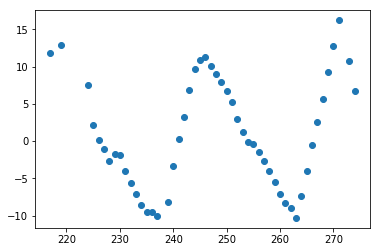

In [27]:
plt.scatter(signal_l.index, signal_l)

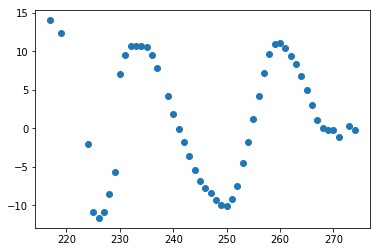

In [28]:
plt.scatter(signal_r.index, signal_r)

In [24]:
_, signal_upper = sig.filter_by_function(signal_r.dropna(), sig.root_mean_square)

# Detect peaks in the ratio data
# A peak represents a frame where the foot first contacts the floor
contact_frames, _ = sig.mean_shift_peaks(signal_upper, kernel='gaussian', radius=5)

In [25]:
contact_frames

array([217, 233, 260])

In [23]:
signal_upper

217    14.020616
219    12.421166
231     9.566326
232    10.706255
233    10.738392
234    10.700254
235    10.567979
236     9.564397
237     7.817264
258     9.663284
259    11.010317
260    11.033079
261    10.482475
262     9.443856
263     8.353170
dtype: float64